TODO:

PCA/feature selection

Removing outliers

Streamlining analysis with scikit

Adding also tensorflow/keras


In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys


In [88]:
def plot_categorical(grouped,label,figsize=(12,8)):
    plt.figure(figsize=figsize)
    labels=[]
    data=[]
    for name,group in grouped:
        labels.append(name)
        data.append(group[label])
    plt.boxplot(data,labels=labels)
    plt.xlabel(name)
    plt.ylabel(label)
    plt.show()

Feature engineering function:

In [89]:
def feat_eng(df:pd.DataFrame):
    #total floors
    df['TotFlrSF']=df['1stFlrSF']+df['2ndFlrSF']
    #total number of floors (1 or 2)
    df['nFlrs']=df['2ndFlrSF'].map(lambda x: int(x>0)+1.)#if df['2ndFlrSF']>0 then df['nFlrs']=2
    df['AvgSF']=df['TotFlrSF']/df['nFlrs']
    df['GarageType']=df['GarageType'].fillna('NoGarage')
    df['GarageQual']=df['GarageQual'].fillna('NoGarage')
    df['GarageCond']=df['GarageCond'].fillna('NoGarage')
    df['PoolQC']=df['PoolQC'].fillna('NoPool')
    df['FireplaceQu']=df['FireplaceQu'].fillna('NoFp')
    #garage cars vs house size
    #number of bathrooms vs house size/n bedrooms
    return df

# Real estate price prediction

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Notes: lots of columns -> possible PCA? (see ml-basic-> clustering tutorial for info on PCA with sklearn)

In [90]:
train,test=pd.read_csv('train.csv'),pd.read_csv('test.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [91]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [92]:
train,test=feat_eng(train),feat_eng(test)

In [93]:
count=test.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [94]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotFlrSF,nFlrs,AvgSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,1710,2.0,855.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,1262,1.0,1262.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,1786,2.0,893.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,1717,2.0,858.5
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,2198,2.0,1099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,8,2007,WD,Normal,175000,1647,2.0,823.5
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2010,WD,Normal,210000,2073,1.0,2073.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,2340,2.0,1170.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2010,WD,Normal,142125,1078,1.0,1078.0


In [95]:
features=test.keys()
print(features)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [96]:
len(features)

83

In [97]:
label='SalePrice'

#### Plotting raw features

In [98]:
plot=False


In [99]:
def plot_synth_f(df:pd.DataFrame,plot_type='s',sf='synth',label='SalePrice'):
    #definition of synthetic feature here
    df[sf]=df['TotFlrSF']#how do I pass a function on the dataframe?
    if plot_type=='c':
        grouped=df.groupby(sf)
        plot_categorical(grouped)
    else:
        plt.scatter(df[sf],df[label])
        plt.xlabel(sf)
        plt.ylabel(label)
        z = np.polyfit(df[sf],df[label], 1)
        p = np.poly1d(z)
        plt.plot(df[sf],p(df[sf]), color='magenta')

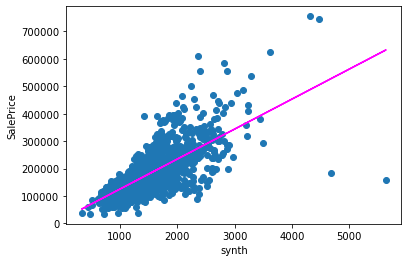

In [100]:
plot_synth_f(train)

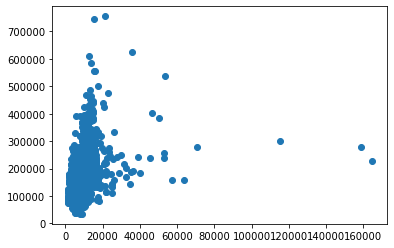

In [101]:
lotareacutoff=200000
plt.scatter(train[train['LotArea']<lotareacutoff]['LotArea'],train[train['LotArea']<lotareacutoff]['SalePrice'])

In [102]:
if plot:
    i=0
    for f in features:
        grouped=train.groupby(f)
        if len(grouped.groups)>=20:
            print(f,i)
            i+=1
            fig=plt.figure(figsize=(12,8))
            plt.scatter(train[f],train[label])
            plt.xlabel(f)
            plt.ylabel(label)
            plt.show()
        else:
            print(f,i)
            i+=1
            plot_categorical(grouped,label=label)
    '''    else:
            fig=plt.figure(12,8)
            plt.scatter(train[f],train[label])'''

Let's see if we can do some feature engineering.

First: find if there are nan entries:

In [103]:
subset_df = test.loc[:, train.isnull().any()]

subset_df

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageYrBlt,GarageFinish,Fence,MiscFeature
0,80.0,NaN,None,0.0,TA,TA,No,Rec,LwQ,SBrkr,1961.0,Unf,MnPrv,NaN
1,81.0,NaN,BrkFace,108.0,TA,TA,No,ALQ,Unf,SBrkr,1958.0,Unf,NaN,Gar2
2,74.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,1997.0,Fin,MnPrv,NaN
3,78.0,NaN,BrkFace,20.0,TA,TA,No,GLQ,Unf,SBrkr,1998.0,Fin,NaN,NaN
4,43.0,NaN,None,0.0,Gd,TA,No,ALQ,Unf,SBrkr,1992.0,RFn,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,NaN,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
1455,21.0,NaN,None,0.0,TA,TA,No,Rec,Unf,SBrkr,1970.0,Unf,NaN,NaN
1456,160.0,NaN,None,0.0,TA,TA,No,ALQ,Unf,SBrkr,1960.0,Unf,NaN,NaN
1457,62.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,SBrkr,NaN,NaN,MnPrv,Shed


In [104]:
count=train.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [105]:
count=test.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtQual,44
BsmtCond,45


#### Selecting the interesting features

In [106]:
int_cat_f=['SaleCondition','TotRmsAbvGrd','ExterQual','Exterior1st','Neighborhood',
            'GarageFinish','KitchenQual','SaleType','PoolQC', 'FullBath','OverallCond',
            'FullBath','HouseStyle','Condition1','MSZoning']
int_num_f=['LotArea','LotFrontage','BsmtFinSF1','TotalBsmtSF',
            'GrLivArea','GarageYrBlt','GarageArea','YearBuilt']
int_ord_f=['GarageCars','OverallQual']

## Beginning regressions

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import set_config
from sklearn.metrics import r2_score,make_scorer,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor


In [109]:
#try using keras model in scikit pipeline.. or just do it all in tensorflow/keras?
#from keras.wrappers.scikit_learn import KerasRegressor

In [110]:
params = [{'regressor': [GradientBoostingRegressor()],
 'regressor__learning_rate': [0.03,0.1, 0.5, 1.0],
 'regressor__n_estimators' : [25,50, 100, 150,200]
 },
 {
    'regressor':[RandomForestRegressor()],
    'regressor__n_estimators' : [25,50, 100, 150,200]
 },
 {
   'regressor':[AdaBoostRegressor()],
   'regressor__learning_rate':[0.03,0.1, 0.5, 1.0],
   'regressor__n_estimators' : [25,50, 100, 150,200]
 }
 ]

https://stackoverflow.com/questions/38555650/try-multiple-estimator-in-one-grid-search

In [111]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_transformer = Pipeline(steps=[
    ('inp',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='median')),
                                    ('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])

ordinal_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, int_num_f),
        ('cat', categorical_transformer, int_cat_f),
        ('ord', ordinal_transformer, int_ord_f)
        ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

In [112]:
def pipeline_builder(n_cols,c_cols,o_cols,b_cols):
    numeric_transformer = Pipeline(steps=[
        ('inp',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='median')),
                                    ('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])
    ordinal_transformer = Pipeline(steps=[('onehot', OrdinalEncoder())])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, n_cols),
        ('cat', categorical_transformer, c_cols),
        ('ord', ordinal_transformer, o_cols),
        ('bin',binned_transformer, b_cols)
        ])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
    pipeline
    return pipeline

In [113]:
score = make_scorer(r2_score)

gridsearch=GridSearchCV(verbose=1,estimator=pipeline,param_grid=params,scoring=score,return_train_score=False,cv=3)


In [114]:

#
x,y=train.drop(label,axis=1),train[label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [115]:
set_config(display='diagram')
gridsearch

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('inp',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'LotFrontage',
                                                                          'BsmtFinSF1',
                                                                          'TotalBsmtSF',
                                                                          'GrLivArea',
                                                                          'GarageArea',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]...
             param_grid=[{'regressor': [GradientBoostingRegressor()],
                          'regressor__learning_rate': [0.03, 0.1, 0.5, 1.0],
                          'regressor__n_estimators': [25, 50, 100, 150, 200]},
                         {'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [25, 50, 100, 150, 200]},
                         {'regressor': [AdaBoostRegressor()],
                          'regressor__learning_rate': [0.03, 0.1, 0.5, 1.0],
                          'regressor__n_estimators': [25, 50, 100, 150, 200]}],
             scoring=make_scorer(r2_score))

In [116]:
model1=gridsearch.fit(x_train,(y_train))

In [117]:
#model1.cv_results_

In [118]:
model1.best_score_

0.8445318206035233

In [119]:
model1.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'BsmtFinSF1', 'TotalBsmtSF',
                                                   'GrLivArea', 'GarageArea',
                                                   'YearBuilt']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SaleCondition',
                                                   'TotRmsAbvGrd', 'ExterQual',
                                                   'Exterior1st',
                                                   'Neighborhood',
                                                   'GarageFinish',
                                                   'KitchenQual', 'SaleType',
                                                   'PoolQC']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['GarageCars',
                                                   'OverallQual'])])),
                ('regressor', RandomForestRegressor(n_estimators=200))])

In [120]:
import datetime

In [121]:
savemodel=True

In [122]:
if savemodel:
    timestamp=datetime.datetime.now().strftime("%d%m%Y%H%M%S")
    models_folder= 'models'
    os.makedirs(models_folder,exist_ok=True)
    model_name= 'model_'+ timestamp +'.joblib'
    modelpath= os.path.join(models_folder,model_name)
    from joblib import dump, load
    dump(model1, modelpath)
    print('Saved ' , modelpath)

Saved  models\model_08112022113928.joblib


In [123]:
def score_and_visualize(model,x_test,y_test):
    predictions=model.predict(x_test)
    plt.figure(figsize=(10,10))
    plt.scatter(y_test,predictions)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    msle=mean_squared_log_error(y_true=y_test, y_pred=predictions)
    r2=r2_score(y_true=y_test, y_pred=predictions)
    print('r2 coefficient: ',r2,'\nmsle = ', msle)
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.axline((0,0),slope=1,ls='--')
    plt.show()

In [124]:
#len(model2[1].feature_importances_)

r2 coefficient:  0.8545571280474205 
msle =  0.01887925065166406


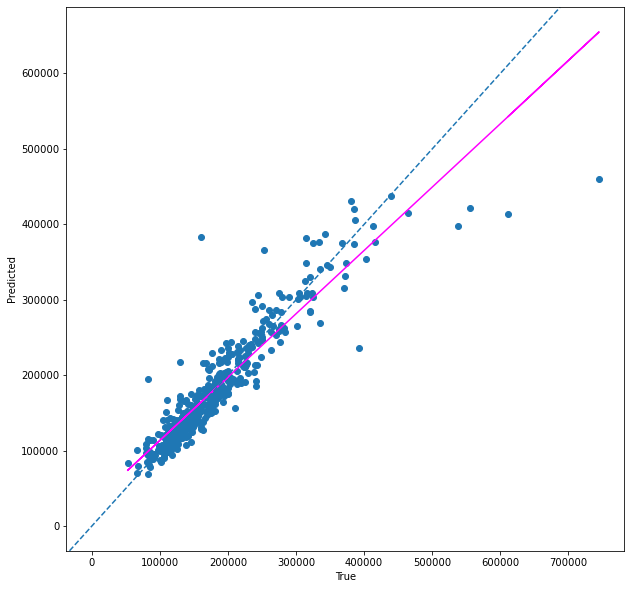

In [125]:
score_and_visualize(model=model1,x_test=x_test,y_test=y_test)
#score_and_visualize(model=model2,x_test=x_test,y_test=y_test)

## Now make predictions on the test dataset

In [126]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


### Make prediction and save

In [127]:
#make prediction on the test set and save
pred=model1.predict(test)


In [128]:
write=True

In [129]:
out_df=pd.read_csv('sample_submission.csv')
out_df['SalePrice']=pred
if write:
    out_df.to_csv('prediction.csv',index=False)